<h3> Disclaimer </h3>
Data is provided by Health Department, Raipur, Chattisgarh.<br>
Data is list of people who are quarantined in home as they came from COVID19 infected area.
<br>
This analysis is to help understand demography of covid19 suspects. In no way analysis is made to terrorize the citizens.
<br>
Some fields in data include personal information of individulas such as name, contact number and address which will not be used in making analysis due to ethical concerns of using data.<b> PERSONAL INFORMATION OF INDIVIDULAS WILL BE DROPPED FROM DATASET<b>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
from datetime import date, datetime
from calendar import day_name

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

In [4]:
style.use('seaborn-darkgrid')

In [5]:
pd.set_option('display.max_rows', 100)

# Importing Files

In [6]:
quarantine_df = pd.read_excel('Home-Quarantine-List.xlsx', index_col='SI No')

# Exploratory Data Analysis

In this section we will get familiarized with data to understand basic structure and type of data. This exploratory data analysis(EDA) will help us to understand data so that we can navigate in right direction for further understanding of underlying trend and seasonality in data.

In [7]:
quarantine_df.head()

,NAME,GENDER,DOB,ARRIVAL,Contact No.,ADDRESS,Ward No.,Traced/Not traced
SI No,,,,,,,,
1,SHUKLA RAMA KANT,M,1964-04-15,2020-03-15,7999103120,"LIG 1832/33 HIRAPUR RAIPUR , CITY - RAIPUR",1,NaN
2,KUMARI KRITI,F,1990-11-05,2020-03-15,9691354546,"D 502 HIRAPUR RAIPUR 492022 , CITY - RAIPUR",1,NaN
3,CHAWDA KHUSHI,F,2003-08-12,2020-03-14,9589866777,"85/1,GOMCHI,RAIPUR, CHHATTISGARH-001 , CITY - ...",1,NaN
4,JOHN ASHISH,M,1992-08-12,2020-03-16,9770006852/ ASHISHJOHN1289\n@GMAIL.COM,"MIG- 1/55 KABIR NAGAR RAIPUR 492001 , CITY - R...",2,NaN
5,SINGH PREM NATH,M,1975-05-06,2020-03-15,9630466404,SHIVANAN NAGAR SEC-4 RAIPUR CHHATISGARH- 48201...,4,NaN


In [8]:
quarantine_df.tail()

,NAME,GENDER,DOB,ARRIVAL,Contact No.,ADDRESS,Ward No.,Traced/Not traced
SI No,,,,,,,,
357,PRATEEK AHUJA,M,1995-09-12,2020-03-16,7354580000,"CHATHADIA PARA , CITY - CHHATISGARH",NaN,NaN
358,THAKKAR HARDIK KUMAR,M,1994-06-13,2020-03-16,8817236365/ HARDIKKUMART\nHAKKAR@GMAI,"AS PER PP , CITY - RAIPUR",NaN,NaN
359,BOTHRA KANISHTHA,F,1998-09-07,2020-03-16,8435744446,"AS PER PPT , CITY - RAIPUR",NaN,NaN
360,JAIN SAURABH,M,1996-02-16,2020-03-17,8103074777/ JSAURABH510@\nGMAIL.COM,"AS PER PPT , CITY - RAIPUR",NaN,NaN
361,SONI SHUBHAM,M,1990-08-15,2020-03-22,7709886600,"NIL , CITY - RAIPUR",NaN,NaN


In [9]:
quarantine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 361
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NAME               361 non-null    object        
 1   GENDER             361 non-null    object        
 2   DOB                290 non-null    datetime64[ns]
 3   ARRIVAL            361 non-null    datetime64[ns]
 4   Contact No.        359 non-null    object        
 5   ADDRESS            360 non-null    object        
 6   Ward No.           320 non-null    object        
 7   Traced/Not traced  0 non-null      float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 25.4+ KB


In [10]:
print('Size of data : ', quarantine_df.shape)

Size of data :  (361, 8)


Here we have data of 360 individulas who are quarantined at home in raipur. Data contatins 8 columns, description of columns are:
<br>
SI No : This is serial number of individuals ranging from 1 to 360.<br>
NAME : Name of individuals.<br>
GENDER : Sex of individuals.<br>
DOB : Date of birth of individuals. <br>
ARRIVAL : Date of arrival in city.<br>
Contact No. : Contact number/ Email address of individuals.<br>
ADDRESS : Address of individual.<br>
Ward No. : Ward number of the individual.<br>
Traced/Not traced : Not sure about this column.<br>
<br>
We don't require some columns as they contain either personal informartion or information which are not useful for this analysis.

In [11]:
quarantine_df.drop(['NAME', 'Contact No.', 'ADDRESS', 'Traced/Not traced'], axis=1, inplace=True)

In [12]:
quarantine_df.head()

,GENDER,DOB,ARRIVAL,Ward No.
SI No,,,,
1,M,1964-04-15,2020-03-15,1
2,F,1990-11-05,2020-03-15,1
3,F,2003-08-12,2020-03-14,1
4,M,1992-08-12,2020-03-16,2
5,M,1975-05-06,2020-03-15,4


In [13]:
quarantine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 361
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   GENDER    361 non-null    object        
 1   DOB       290 non-null    datetime64[ns]
 2   ARRIVAL   361 non-null    datetime64[ns]
 3   Ward No.  320 non-null    object        
dtypes: datetime64[ns](2), object(2)
memory usage: 14.1+ KB


Data contains some missing values in DOB and Ward No. columns, We will try to impute missing values with appropriate data for representative analysis. How we will fill data ? <br>
<b> DOB </b> : Filling missing DOB with average age of sample population.<br>
<b> Ward No. </b> : Filling missing Ward no. with 0 to show that ward number is unknown.

In [14]:
quarantine_df['DOB'].fillna(quarantine_df['DOB'].mean(), inplace=True)

In [15]:
quarantine_df['Ward No.'].fillna(0, inplace=True)

Now data is cleaned and missing fields are imputed with appropriate values now we can dig deeper in data and understand it.

In [16]:
quarantine_df.describe()

,GENDER,DOB,ARRIVAL,Ward No.
count,361,361,361,361.0
unique,2,281,15,51.0
top,M,1983-12-17 17:57:31.034482752,2020-03-14 00:00:00,0.0
freq,225,71,105,41.0
first,NaN,1900-01-09 00:00:00,2020-03-02 00:00:00,NaN
last,NaN,2018-10-25 00:00:00,2020-03-22 00:00:00,NaN


<h3>Insights of data so far....</h3>
<br>
In this data we have, <br>
1. 361 entries with 2 unique gender.<br>
2. youngest home quarantined person is born in 2018 whereas oldest is born in 1900(which must be error of data entry operator).<br>
3. Data contains people who arrived from 2 March 2020 to 22 March 2020 in the city.<br>
4. Only 51 wards out of 72 wards have home quarantined people rest 21 wards do not have any home quarantined person in it.

<h5>Adding features</h5>
Now we will add some new columns in dataset based on the data available. New columns are :<br>
1. <b> Age</b> : Age of the person.<br>
2. <b> Ward Name </b> : Ward Name to which person belong.

In [17]:
quarantine_df['Age'] = quarantine_df['DOB'].apply(lambda x: 2020 - x.year )

In [18]:
quarantine_df['Age_group'] = quarantine_df['Age'].apply(lambda x: 'Minors' if x < 18 else('Working' if 18 <= x <= 60 else 'Seniors'))

In [19]:
quarantine_df = quarantine_df[quarantine_df['Age'] < 100]

<h4> Adding Ward Name</h4>

In [20]:
wardlist_df = pd.read_excel('raipur_ward_list.xlsx') 

Area is not relevant to us as extracting area from address will break down data in minute parts which might not be useful for this overview analysis, hence we will drop Area and another irrelevant columns.

In [21]:
wardlist_df.head()

,Ward no.,Ward name,Lat,Long
0,1,Vir Sawarkar Nagar Ward,21.267480,81.631420
1,2,Ramkrishana Pramhans Ward,21.268540,81.632140
2,3,Sant Kabir Nagar Ward,21.268530,81.631690
3,4,Yatiyatan Lal Ward,21.237580,81.663440
4,5,Banjari Mata Mandir Ward,21.239246,81.628362


In [22]:
quarantine_df['Ward Name'] = quarantine_df['Ward No.'].apply(lambda x: x if type(x)!= int 
                                                             else ('Raipur' if x == 0 
                                                                   else wardlist_df[(wardlist_df['Ward no.'] == x)]['Ward name'][x-1]))

In [23]:
quarantine_df['Lat'] = 21.2480167
quarantine_df['Long'] = 81.612229
for i in range(quarantine_df.shape[0]):
    for j in range(wardlist_df.shape[0]):
        if(quarantine_df.iloc[i]['Ward Name'] == wardlist_df.iloc[j]['Ward name']):
            quarantine_df.iloc[i, quarantine_df.columns.get_loc('Lat')] = wardlist_df.iloc[j]['Lat']
            quarantine_df.iloc[i, quarantine_df.columns.get_loc('Long')] = wardlist_df.iloc[j]['Long']

In [24]:
quarantine_df.head()

,GENDER,DOB,ARRIVAL,Ward No.,Age,Age_group,Ward Name,Lat,Long
SI No,,,,,,,,,
1,M,1964-04-15,2020-03-15,1,56,Working,Vir Sawarkar Nagar Ward,21.26748,81.63142
2,F,1990-11-05,2020-03-15,1,30,Working,Vir Sawarkar Nagar Ward,21.26748,81.63142
3,F,2003-08-12,2020-03-14,1,17,Minors,Vir Sawarkar Nagar Ward,21.26748,81.63142
4,M,1992-08-12,2020-03-16,2,28,Working,Ramkrishana Pramhans Ward,21.26854,81.63214
5,M,1975-05-06,2020-03-15,4,45,Working,Yatiyatan Lal Ward,21.23758,81.66344


In [25]:
quarantine_df.sort_values(axis=0, by=['ARRIVAL'], inplace=True)

Now we need to separate day and week from arrival date to get periodic trend if there is any

In [26]:
quarantine_df['Arrival_week'] = quarantine_df['ARRIVAL'].apply(lambda x: x.week-9)

In [27]:
quarantine_df['Arrival_day'] = quarantine_df['ARRIVAL'].apply(lambda x: day_name[x.weekday()])

In [28]:
quarantine_df.drop(['DOB'], axis=1, inplace=True)

In [29]:
quarantine_df['Frequency'] = quarantine_df['Ward No.'].apply(lambda x: quarantine_df['Ward No.'].value_counts()[x])

In [30]:
quarantine_df['Frequency_arrival'] = 0
for i in range(quarantine_df.shape[0]):
    quarantine_df.iloc[i, quarantine_df.columns.get_loc('Frequency_arrival')] = i+1 

In [31]:
quarantine_df.reset_index(drop=True, inplace=True)

In [32]:
quarantine_df.head(5)

,GENDER,ARRIVAL,Ward No.,Age,Age_group,Ward Name,Lat,Long,Arrival_week,Arrival_day,Frequency,Frequency_arrival
0,M,2020-03-02,23,61,Seniors,Rani Laxmi Bai Ward,21.259803,81.640418,1,Monday,1,1
1,M,2020-03-09,0,28,Working,Raipur,21.248017,81.612229,2,Monday,41,2
2,F,2020-03-09,0,27,Working,Raipur,21.248017,81.612229,2,Monday,41,3
3,F,2020-03-09,26,26,Working,Kushbhau Thakare Ward,21.270686,81.669556,2,Monday,7,4
4,M,2020-03-09,0,29,Working,Raipur,21.248017,81.612229,2,Monday,41,5


In [33]:
quarantine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GENDER             350 non-null    object        
 1   ARRIVAL            350 non-null    datetime64[ns]
 2   Ward No.           350 non-null    object        
 3   Age                350 non-null    int64         
 4   Age_group          350 non-null    object        
 5   Ward Name          350 non-null    object        
 6   Lat                350 non-null    float64       
 7   Long               350 non-null    float64       
 8   Arrival_week       350 non-null    int64         
 9   Arrival_day        350 non-null    object        
 10  Frequency          350 non-null    int64         
 11  Frequency_arrival  350 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 32.9+ KB


Now, we have complete and clean dataset which contains 12 coloumns and 350 entries. Coloumns description is provided below:<br>
1. <b>Gender</b>: Gender of the person.<br>
2. <b>ARRIVAL</b> : Date of arrival in city.<br>
3. <b>Ward no.</b> : Ward no. of person.<br>
4. <b>Age</b> : Age of individual.<br>
5. <b>Age Group</b> : Age group of people i.e. Minors, Working Professionals, Senior citizens.<br>
6. <b>Ward Name</b>: Ward Name to which person belongs.<br>
7. <b>Lat</b> : Lattitude of ward.<br>
8. <b>Long</b> : Longitude of ward.<br>
9. <b>Arrival_Week</b> : Week of arrival in march.</br>
10. <b>Arrival_day</b> : Day of Arrival.<br>
11. <b>Frequency</b> : Number of person in area.<br>
12. <b> Frequency_arrival </b> : Cumulative sum of individauls on each date.

In [34]:
quarantine_df.to_excel(r'quarantine_Raipur.xls')

# Data Visualization

It is most important part of this analysis. In this part we will gain insights in data, As it is said a picture is worth a thousand words, this part will be most useful for understanding underlying patterns like in which area, age group are more vurnulable to the virus, in which day/week most of the people arrived in city.

In [35]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

<h2>Area</h2>

In [36]:
raipur_map = plt.imread('map (3).png')

In [37]:
BBox = (quarantine_df['Long'].min(), quarantine_df['Long'].max(), quarantine_df['Lat'].min(), quarantine_df['Lat'].max())

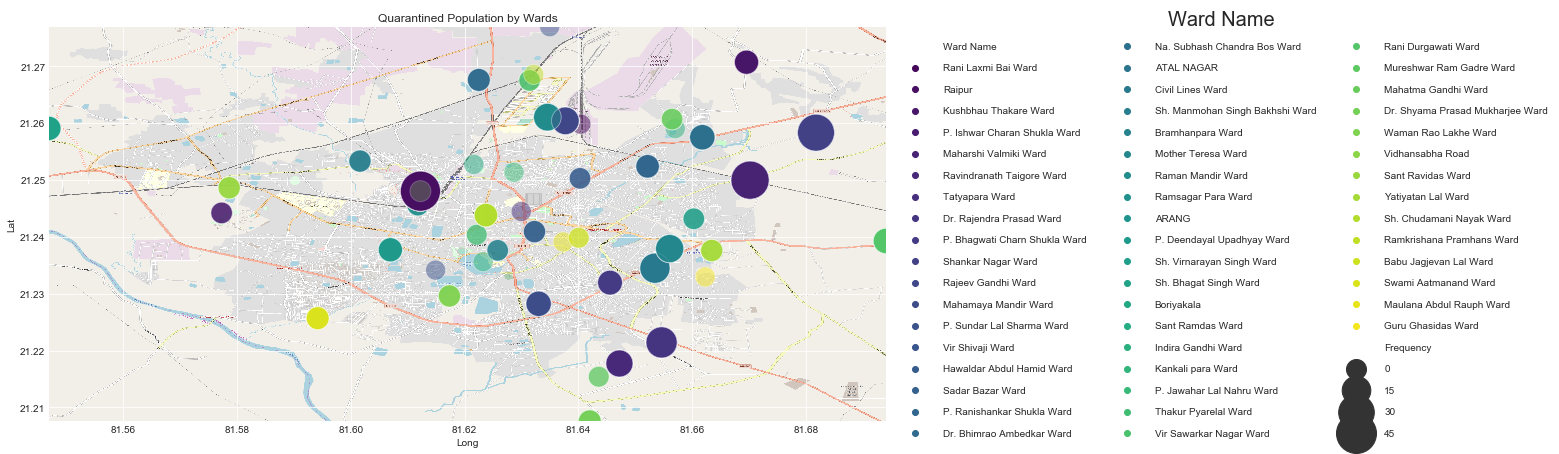

In [38]:
fig2, ax2 = plt.subplots(figsize=(15, 15))
map_plot = sns.scatterplot(x='Long', y='Lat', hue='Ward Name' ,size='Frequency',
                           sizes=(400, 1600) ,data=quarantine_df,ax=ax2, palette='viridis', legend='brief', alpha=0.5)
map_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, shadow=True, title='Ward Name', title_fontsize='20',
               labelspacing=1.25, handlelength=4.0)
ax2.set_xlim(BBox[0],BBox[1])
ax2.set_ylim(BBox[2],BBox[3])
ax2.imshow(raipur_map, zorder=0, extent = BBox, aspect= 'equal')
ax2.set_title('Quarantined Population by Wards')
plt.show()

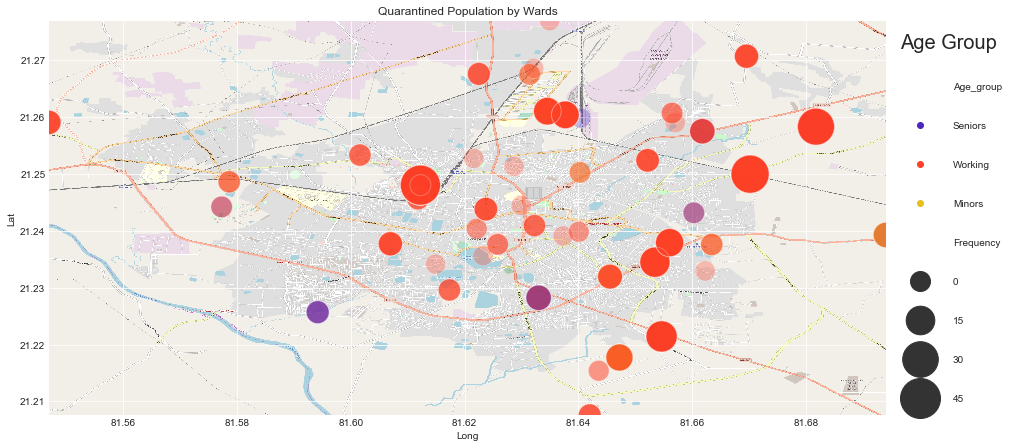

In [39]:
fig2, ax2 = plt.subplots(figsize=(15, 15))
map_plot = sns.scatterplot(x='Long', y='Lat', hue='Age_group' ,size='Frequency',
                           sizes=(400, 1600) ,data=quarantine_df,ax=ax2, palette='CMRmap', legend='brief', alpha=0.3)
map_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, shadow=True, title='Age Group', title_fontsize='20',
                labelspacing = 3.0, handlelength=5.0)
ax2.set_xlim(BBox[0],BBox[1])
ax2.set_ylim(BBox[2],BBox[3])
ax2.imshow(raipur_map, zorder=0, extent = BBox, aspect= 'equal')
ax2.set_title('Quarantined Population by Wards')
plt.show()

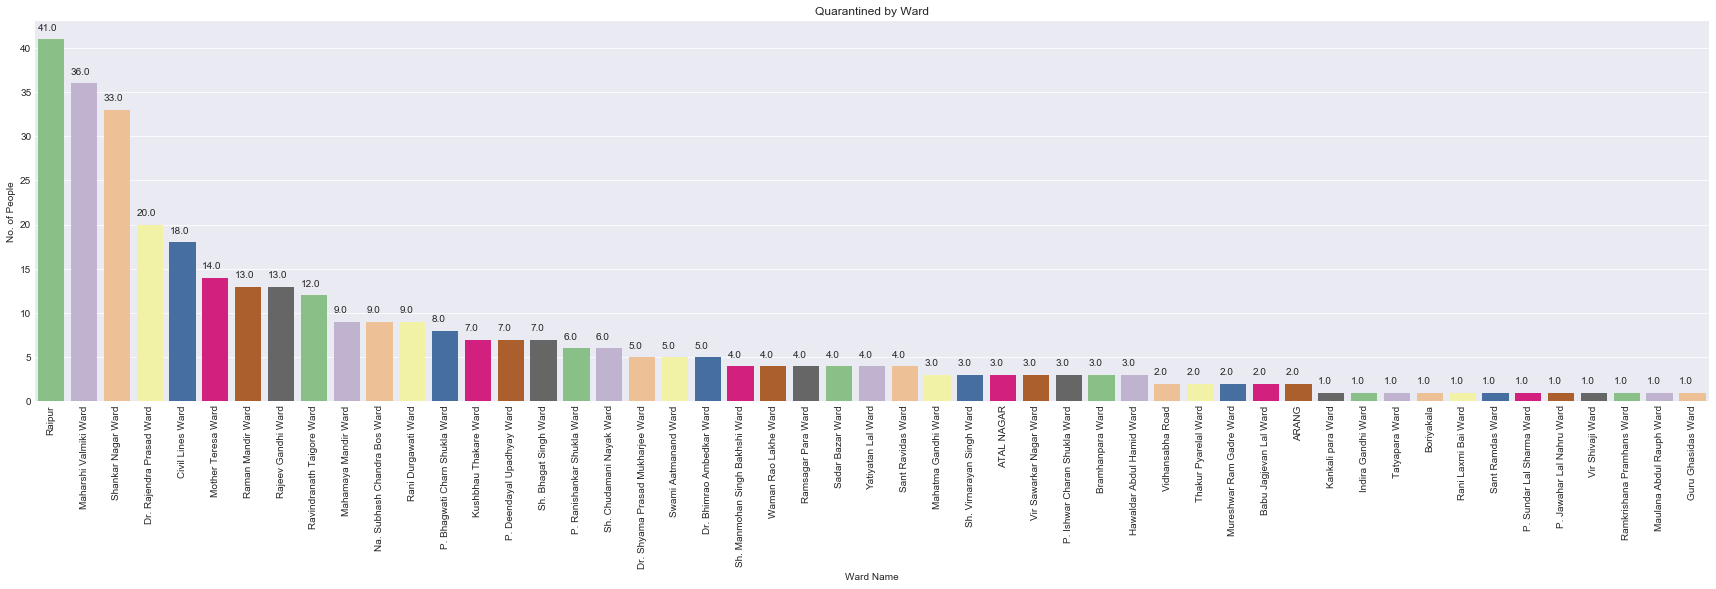

In [40]:
fig6, ax6 = plt.subplots(figsize=(30, 7))
ward_countplot = sns.countplot(quarantine_df['Ward Name'], order=quarantine_df['Ward Name'].value_counts().index,
                               palette='Accent', ax=ax6)
ward_countplot.set_xticklabels(ward_countplot.get_xticklabels(),rotation=90)
ax6.set_title('Quarantined by Ward')
ax6.set_ylabel('No. of People')
annot_plot(ward_countplot, 0, 1)

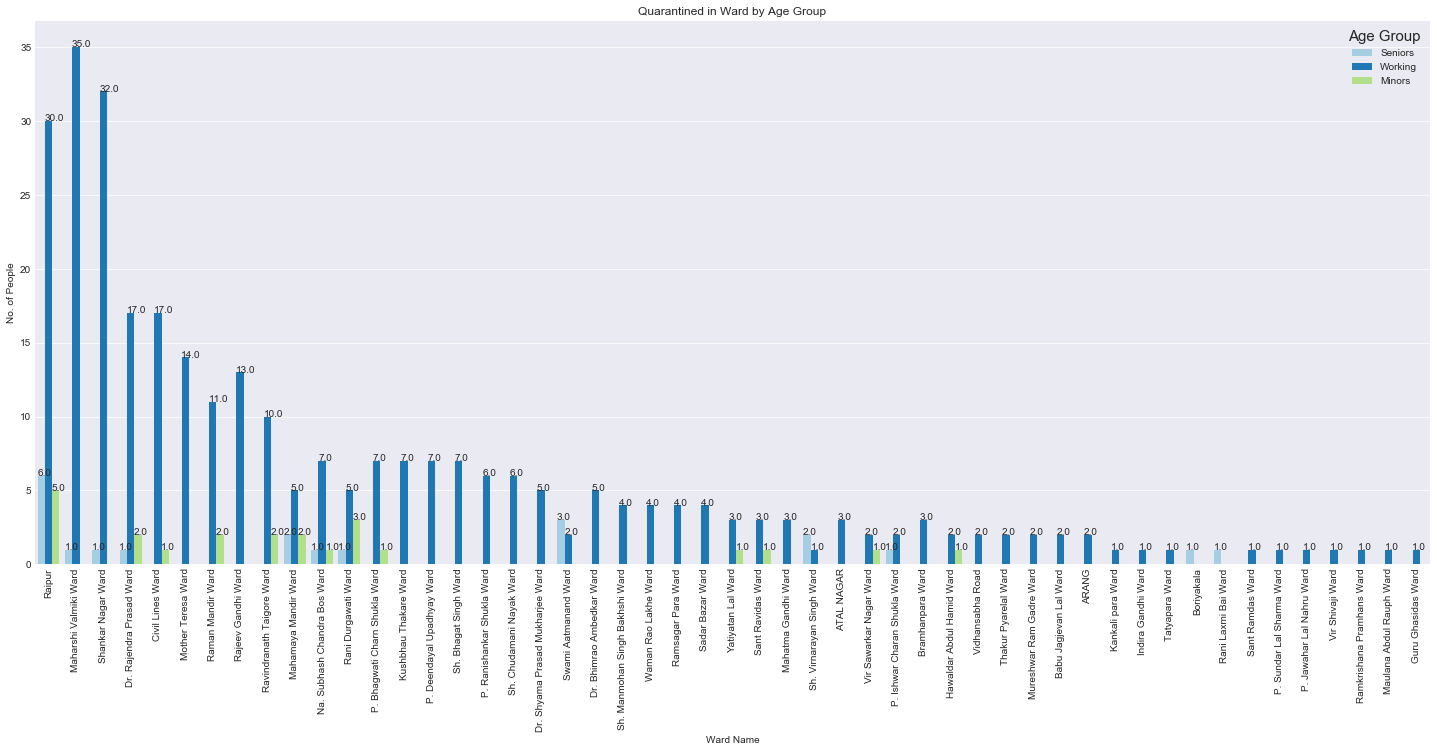

In [41]:
fig7, ax7 = plt.subplots(figsize=(25, 10))
ward_age_countplot = sns.countplot(x='Ward Name', order=quarantine_df['Ward Name'].value_counts().index,
                               hue='Age_group', data=quarantine_df, palette='Paired', saturation=1, ax=ax7)
ward_age_countplot.set_xticklabels(ward_countplot.get_xticklabels(),rotation=90)
ward_age_countplot.legend(loc='upper right',title='Age Group', title_fontsize='15')
ax7.set_title('Quarantined in Ward by Age Group')
ax7.set_ylabel('No. of People')
annot_plot(ward_age_countplot, -0.01, 0)

From the above graph top 10 wards have highest 36 people quarantined and lowest 9 people. Further investigation needed to know whether concentration is in middle of city, outer bound or scattered throughout the city.

<h2>Time Series</h2>

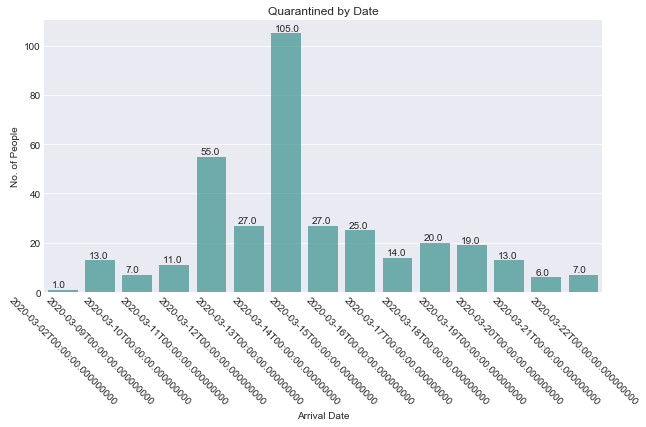

In [42]:
fig8, ax8 = plt.subplots(figsize=(10, 5))
date_count_plot = sns.countplot(x=quarantine_df['ARRIVAL'].sort_values(),
                                color='#29a19c', alpha=0.7)
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=-45)
ax8.set_title('Quarantined by Date')
ax8.set_xlabel('Arrival Date')
ax8.set_ylabel('No. of People')
annot_plot(date_count_plot, 0.1, 1)
plt.show()

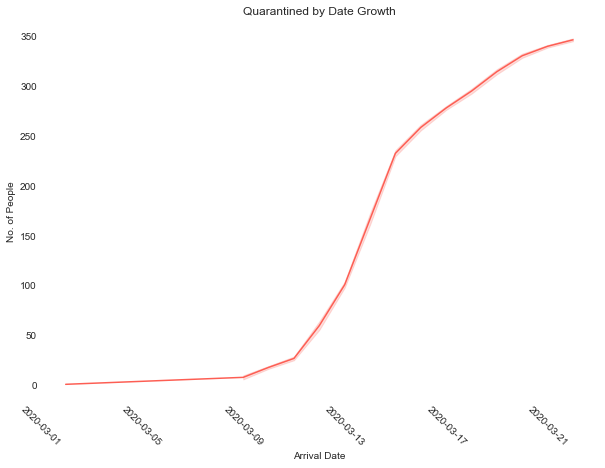

In [43]:
fig5, ax5 = plt.subplots(figsize=(10,7))
ax5.set_facecolor('xkcd:white')
line_of_spread = sns.lineplot(x='ARRIVAL', y='Frequency_arrival', data=quarantine_df, ax=ax5, color='#fd5e53')
plt.draw()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=-45)
ax5.set_title('Quarantined by Date Growth')
ax5.set_xlabel('Arrival Date')
ax5.set_ylabel('No. of People')
plt.show()

<h2> Age </h2>

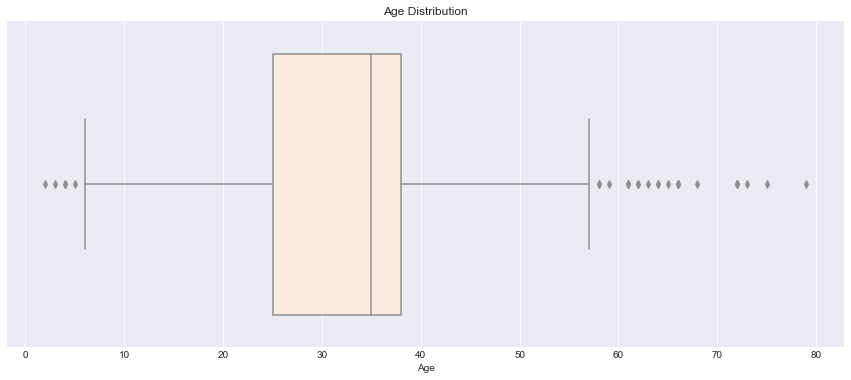

In [44]:
plt.figure(figsize=(15, 6))
age_box_plot  = sns.boxplot(quarantine_df['Age'], color='#ffebd9')
age_box_plot.set_title('Age Distribution')
plt.show()

This plot shows us that majority of people quarantine are between age 7 and 57 with median of around 36 years old.<br>
There are more older people outside center 2 percentile range (50% - 75% range) quarantined then younger children. 

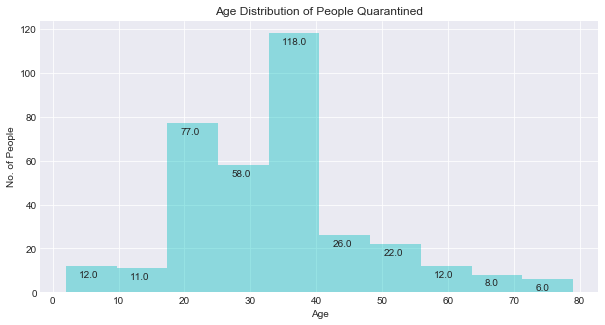

In [45]:
plt.figure(figsize=(10, 5))
age_distplot = sns.distplot(quarantine_df['Age'], bins=10, kde=False, color='c')
age_distplot.set_title('Age Distribution of People Quarantined')
plt.ylabel('No. of People')
annot_plot(age_distplot,2,-5)
plt.show()

In [46]:
# Pie Chart prepration
labels = ['Minors', 'Working Professionals' ,'Senior Citizens']
minors, working, seniors = 0, 0, 0
for age in quarantine_df['Age']:
    if(age < 18):
        minors +=1
    elif(18 <= age < 60):
        working +=1
    else:
        seniors +=1
sizes = [minors, working, seniors]
explode = [0, 0.1, 0]
# add colors
colors = ['#ff9999', '#66b3ff', '#99ff99']

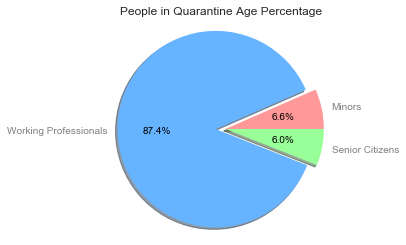

In [47]:
# Plotting Pie charts
fig1, ax1 = plt.subplots()
patlets, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
ax1.axis('equal')
ax1.set_title('People in Quarantine Age Percentage')
plt.show()

Data clearly shows that majority of people are in their late 30's and early 20's this might be due to fact that younger person tends to move out of hometown to earn a living and also they move back in when there is a disater on workplace.<br>
Childrens between 0 to 20 years are more than elder in age group of 70 to 80.<br>
There are only 6% senior citizens are quarantined, whereas 6.5% minors are quarantined.<br>
Approximately 87.4% people are in age group of working professionals. This fact somewhat proves migration reason of people from infected areas.

<h2> Gender</h2>

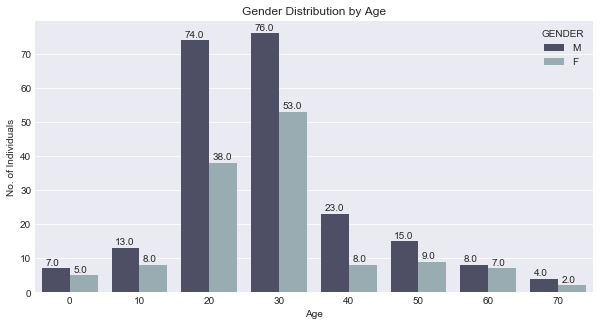

In [48]:
colors = ['#ecfbfc', '#ffebd9', '#ffc8bd', '#235952']
plt.figure(figsize=(10,5))
gender_countplot = sns.countplot(x=(quarantine_df['Age'] // 10)*10, hue=quarantine_df['GENDER'], palette='bone')
gender_countplot.set_title('Gender Distribution by Age')
plt.ylabel('No. of Individuals')
annot_plot(gender_countplot,0.05, 1)
plt.savefig('Gender_Age_Distribution.png')

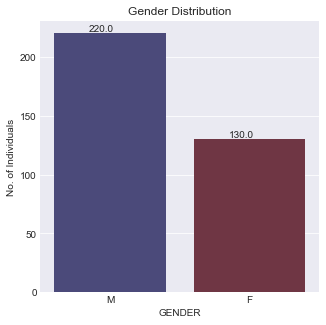

In [49]:
colors = ['#ecfbfc', '#ffebd9', '#ffc8bd', '#235952']
plt.figure(figsize=(5,5))
gender_countplot = sns.countplot(x=quarantine_df['GENDER'], palette='icefire')
gender_countplot.set_title('Gender Distribution')
plt.ylabel('No. of Individuals')
annot_plot(gender_countplot,0.25, 1.5)

In [50]:
# Pie Chart prepration
labels = ['Male', 'Female']
male, female = 0, 0
for gender in quarantine_df['GENDER']:
    if(gender == 'M'):
        male +=1
    else:
        female +=1
sizes = [male, female]
explode = [0, 0.1,]
# add colors
colors = ['#84a9ac', '#cae8d5']

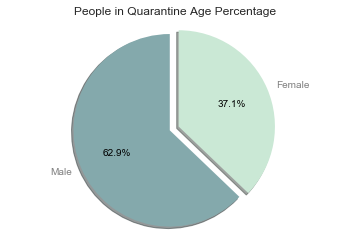

In [51]:
# Plotting Pie charts
fig1, ax1 = plt.subplots()
platelets, texts, autotexts= ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
ax1.axis('equal')
ax1.set_title('People in Quarantine Age Percentage')
plt.show()

From gender plot it is clear that males are more in quarantined then females. Males are around 63% whereas females only 37%.
There is almost 26% diffrence between male and female quarantined ratios

<h2>Week and Days</h2>

<h3> Week </h3> 

In [52]:
# Pie Chart prepration for week
labels = ['Week 1', 'Week 2', 'Week 3']
week_1, week_2, week_3 = 0, 0, 0
for week in quarantine_df['Arrival_week']:
    if(week == 1):
        week_1 +=1
    elif week == 2:
        week_2 +=1
    else:
        week_3 +=1
sizes = [week_1, week_2, week_3]
explode = [0.2, 0.0, 0.0]
# add colors
colors = ['#ffd1bd', '#ffb0cd', '#c2f0fc']

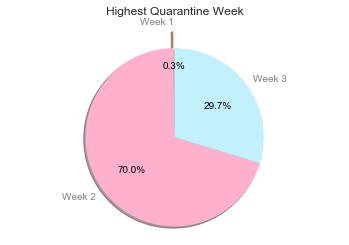

In [53]:
# Plotting Pie charts
fig1, ax1 = plt.subplots()
platelets, texts, autotexts= ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
ax1.axis('equal')
ax1.set_title('Highest Quarantine Week')
plt.show()

<h3> Day </h>

In [54]:
# Pie Chart prepration for days
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mon, tue, wed, thu, fri, sat, sun = 0, 0, 0, 0, 0, 0, 0
for day in quarantine_df['Arrival_day']:
    if(day == 'Monday'):
        mon +=1
    elif day == 'Tuesday':
        tue +=1
    elif day == 'Wednesday':
        wed +=1
    elif day == 'Thursday':
        thu +=1
    elif day == 'Friday':
        fri +=1
    elif day == 'Saturday':
        sat +=1
    else:
        sun +=1
sizes = [mon, tue, wed, thu, fri, sat, sun]
explode = [0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0]
# add colors
colors = ['#cff1ef', '#ffffff', '#fbcffc', '#be79df', '#ffb6b6', '#fde2e2', '#aacfcf']

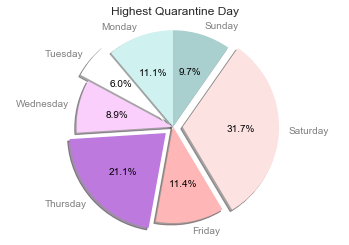

In [55]:
# Plotting Pie charts for Days in week
fig1, ax1 = plt.subplots()
platelets, texts, autotexts= ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
ax1.axis('equal')
ax1.set_title('Highest Quarantine Day')
plt.show()

In [58]:
quarantine_df.describe()

,Age,Lat,Long,Arrival_week,Frequency,Frequency_arrival
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.988571,21.245021,81.642101,2.294286,17.885714,175.500000
std,13.539918,0.014006,0.029582,0.462609,13.897643,101.180532
min,2.000000,21.207554,81.546918,1.000000,1.000000,1.000000
25%,25.000000,21.237580,81.618397,2.000000,6.000000,88.250000
50%,35.000000,21.248017,81.647214,2.000000,13.000000,175.500000
75%,38.000000,21.258098,81.663440,3.000000,33.000000,262.750000
max,79.000000,21.276927,81.694070,3.000000,41.000000,350.000000


In [60]:
len(quarantine_df['Ward Name'].unique())

51